<h2 align='center'> MÔN HỌC: <br> HỌC MÁY (MACHINE LEARNING) </h2>

---

### CHƯƠNG 5: HỆ THỐNG GỢI Ý (RECOMMENDER SYSTEMS)
---
**NỘI DUNG BÀI HỌC:**
1. Giới thiệu chung
2. Phân loại hệ thống đề xuất
3. Các phương pháp tính toán độ tương đồng
4. Sơ đồ tổng quan và Thách thức
5. Ví dụ minh họa
---
dangvannam@Department of Computer Science@2020

---
### XÂY DỰNG HỆ THỐNG GỢI Ý MOVIES
Dự án này sẽ xây dựng một hệ thống đề xuất dựa trên tập dữ liệu Movies.

<img src='Pic/pic1.png' width='500px'>

Dựa vào dữ liệu của trên 12 182 bộ films, xây dựng hệ thống đề xuất đưa ra danh sách 15 bộ film liên quan. Có hai loại Recommender system được xây dựng trong project này:


*   Simple Recommender
*   Content-Based Recommender

Các file dữ liệu sử dụng bao gồm:

**Data_Movies.csv:** File này chứa thông tin tổng hợp của ~ 12 000 bộ film, mỗi bộ film có 24 thuộc tính khác nhau, một số thuộc tính chính bao gồm:

1. adult: Bộ film dành cho người lớn hay không. Dữ liệu boolean (True - Flase)
2. original_language: Ngôn ngữ ban đầu; dữ liệu categorical
3. genres: Thể loại film
4. original_title: Tiêu đề của film, dữ liệu text
5. overview: Tóm tắt nội dung của film; Dữ liệu text
6. release_date: Ngày phát hành films
7. vote_average: Điểm đánh giá trung bình cho bộ phim [0: dở tệ - 10: Xuất sắc]
8. vote_count: Số lượt xem đánh giá bộ phim

## I) Đọc tập dữ liệu Movie
---

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#Đọc tập dữ liệu thông tin của các film
data_movies = pd.read_csv('data/Data_Movies.csv')

#Hiển thị thông tin tập dữ liệu
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12182 entries, 0 to 12181
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  12182 non-null  bool   
 1   belongs_to_collection  2409 non-null   object 
 2   budget                 12182 non-null  int64  
 3   genres                 12182 non-null  object 
 4   homepage               3330 non-null   object 
 5   id                     12182 non-null  int64  
 6   imdb_id                12180 non-null  object 
 7   original_language      12182 non-null  object 
 8   original_title         12182 non-null  object 
 9   overview               12119 non-null  object 
 10  popularity             12182 non-null  float64
 11  poster_path            12182 non-null  object 
 12  production_companies   12182 non-null  object 
 13  production_countries   12182 non-null  object 
 14  release_date           12180 non-null  object 
 15  re

In [2]:
#Hiển thị dữ liệu 5 dòng đầu tiên
data_movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


**Lọc dữ liệu thô ban đầu chỉ lấy các cột quan trọng sử dụng để xây dựng hệ thống gợi ý:**
* adult: Bộ film dành cho người lớn hay không. Dữ liệu boolean (True - Flase)
* original_language: Ngôn ngữ ban đầu; dữ liệu categorical
* original_title: Tiêu đề của film, dữ liệu text
* overview: Tóm tắt nội dung của film; Dữ liệu text
* release_date: Ngày phát hành film
* vote_average: Tỷ lệ vote trung bình [0-10]
* vote_count: Số lượt vote

In [48]:
data = data_movies[['original_title',
                    'original_language',
                      'overview',
                      'release_date',
                      'vote_average',
                      'vote_count']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12182 entries, 0 to 12181
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_title     12182 non-null  object 
 1   original_language  12182 non-null  object 
 2   overview           12119 non-null  object 
 3   release_date       12180 non-null  object 
 4   vote_average       12182 non-null  float64
 5   vote_count         12182 non-null  float64
dtypes: float64(2), object(4)
memory usage: 571.2+ KB


data = data_movies.loc[:,['adult',
                          'original_title',
                          'overview',
                          'release_date',
                          'vote_average',
                          'vote_count']].copy()
data.info()

In [49]:
data.head()

,original_title,original_language,overview,release_date,vote_average,vote_count
0,Toy Story,en,"Led by Woody, Andy's toys live happily in his ...",1995-10-30,7.7,5415.0
1,Jumanji,en,When siblings Judy and Peter discover an encha...,1995-12-15,6.9,2413.0
2,Grumpier Old Men,en,A family wedding reignites the ancient feud be...,1995-12-22,6.5,92.0
3,Waiting to Exhale,en,"Cheated on, mistreated and stepped on, the wom...",1995-12-22,6.1,34.0
4,Father of the Bride Part II,en,Just when George Banks has recovered from his ...,1995-02-10,5.7,173.0


In [50]:
data.tail()

,original_title,original_language,overview,release_date,vote_average,vote_count
12177,Frankenstein Created Woman,en,A deformed tormented girl drowns herself after...,1967-03-15,5.9,33.0
12178,Take Me,en,Ray is a fledgling entrepreneur who specialize...,2017-05-05,6.0,38.0
12179,The Incredible Jessica James,en,"Burned by a bad breakup, a struggling New York...",2017-01-27,6.2,37.0
12180,In a Heartbeat,en,A closeted boy runs the risk of being outed by...,2017-06-01,8.3,146.0
12181,Cadet Kelly,en,Hyperactive teenager Kelly is enrolled into a ...,2002-03-07,5.2,145.0


In [51]:
#Tìm kiếm film theo tên:
data[data.original_title=='Titanic']

,original_title,original_language,overview,release_date,vote_average,vote_count
980,Titanic,en,"84 years later, a 101-year-old woman named Ros...",1997-11-18,7.5,7770.0
9646,Titanic,en,A story of the romances of two couples upon th...,1996-11-17,6.3,45.0


In [52]:
#Đặc trưng thống kê các thuôc tính số
data.describe()

,vote_average,vote_count
count,12182.000000,12182.000000
mean,6.308644,388.224594
std,0.919185,891.546891
min,0.000000,31.000000
25%,5.700000,50.000000
50%,6.400000,99.000000
75%,7.000000,299.000000
max,9.500000,14075.000000


In [53]:
# view data
data[data['vote_average']>=9.5]

,original_title,original_language,overview,release_date,vote_average,vote_count
11991,Planet Earth II,en,David Attenborough presents a documentary seri...,2016-11-06,9.5,50.0


In [54]:
data[data['vote_average']<=0]

,original_title,original_language,overview,release_date,vote_average,vote_count
9820,Avatar 2,en,A sequel to Avatar (2009).,2020-12-16,0.0,58.0


In [55]:
data[data['vote_count']>=14000]

,original_title,original_language,overview,release_date,vote_average,vote_count
7116,Inception,en,"Cobb, a skilled thief who commits corporate es...",2010-07-14,8.1,14075.0


In [56]:
#Đặc trưng thống kê dữ liệu Object
data.describe(include=['O'])

,original_title,original_language,overview,release_date
count,12182,12182,12119,12180
unique,11828,48,12099,6884
top,Life,en,No overview found.,2009-01-01
freq,4,9598,8,19


In [57]:
data[data['original_title']=='Life']

,original_title,original_language,overview,release_date,vote_average,vote_count
1540,Life,en,Two men in 1930s Mississippi become friends af...,1999-04-16,6.4,179.0
10751,Life,en,"In 1955, young photographer Dennis Stock devel...",2015-07-24,5.9,128.0
11387,Life,en,David Attenborough's legendary BBC crew explai...,2009-12-14,8.5,65.0
11903,Life,en,The six-member crew of the International Space...,2017-03-22,6.3,1959.0


In [9]:
data[data.overview=='No overview found.']

,adult,original_title,overview,release_date,vote_average,vote_count
5024,False,Tanguy,No overview found.,2001-11-21,5.8,70.0
8078,False,Mais qui a tué Pamela Rose ?,No overview found.,2003-06-04,6.6,62.0
9721,False,"Grande, grosso e Verdone",No overview found.,2008-03-07,5.6,78.0
10103,False,7 Zwerge - Der Wald ist nicht genug,No overview found.,2006-10-25,4.9,44.0
10516,False,Lezioni di cioccolato,No overview found.,2007-11-23,5.8,42.0
10566,False,Il cosmo sul comò,No overview found.,2008-12-19,5.0,156.0
10612,False,Fantozzi subisce ancora,No overview found.,1983-01-01,6.4,77.0
11093,False,Jean-Philippe,No overview found.,2006-04-05,5.4,48.0


# **2) Tiền xử lý dữ liệu tập Movies**
---

## **2.1) Chuẩn hóa dữ liệu:**
---
* Kiểm tra dữ liệu null của các thuộc tính
* Loại bỏ các bộ film có thuộc tín null
* Sắp xếp lại các bộ film theo ngày phát hành

In [58]:
#Thống kê số liệu missing trong Data frame
#Theo từng cột
print('Số lượng missing data trong file dữ liệu:')
print(data.isnull().sum())

Số lượng missing data trong file dữ liệu:
original_title        0
original_language     0
overview             63
release_date          2
vote_average          0
vote_count            0
dtype: int64


In [59]:
#Liệt kê các bộ phim có thuộc tính tóm tắt là rỗng:
data[data['overview'].isnull()==True]

,original_title,original_language,overview,release_date,vote_average,vote_count
6728,Fuga de Cerebros,es,NaN,2009-01-01,5.5,42.0
8983,Les trois frères : Le retour,fr,NaN,2014-02-12,5.0,110.0
9017,Prêt à tout,fr,NaN,2014-01-21,5.4,55.0
9282,L'Italien,fr,NaN,2010-07-07,5.5,53.0
9626,Ricky e Barabba,it,NaN,1992-12-19,5.7,41.0
...,...,...,...,...,...,...
12014,Omicidio all'italiana,it,NaN,2017-03-02,6.3,69.0
12074,Halal Police d'Etat,fr,NaN,2011-02-16,4.5,35.0
12123,Viva l'Italia,it,NaN,2012-10-25,6.1,57.0
12127,Notte prima degli esami - Oggi,it,NaN,2007-02-14,5.0,137.0


In [60]:
#Xóa tất cả các bộ film có chứa thuộc tính null
data.dropna(axis=0,how='any',inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12117 entries, 0 to 12181
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_title     12117 non-null  object 
 1   original_language  12117 non-null  object 
 2   overview           12117 non-null  object 
 3   release_date       12117 non-null  object 
 4   vote_average       12117 non-null  float64
 5   vote_count         12117 non-null  float64
dtypes: float64(2), object(4)
memory usage: 662.6+ KB


In [61]:
#Sắp xếp lại dữ liệu theo ngày phát hành
data.sort_values('release_date',axis=0,inplace=True)
data.head()

,original_title,original_language,overview,release_date,vote_average,vote_count
9712,La Sortie de l'Usine Lumière à Lyon,fr,Working men and women leave the Lumière factor...,1895-06-10,6.2,52.0
9272,Arroseur et arrosé,fr,"A gardener is watering his flowers, when a mis...",1895-12-27,7.0,44.0
8291,L'arrivée d'un train en gare de La Ciotat,es,A group of people are standing along the platf...,1896-01-25,6.9,87.0
5035,Le Voyage dans la Lune,fr,A Trip to The Moon is a science fiction film f...,1902-09-01,7.9,314.0
5634,The Great Train Robbery,en,The clerk at the train station is assaulted an...,1903-12-01,7.1,116.0


In [14]:
data.tail()

,adult,original_title,overview,release_date,vote_average,vote_count
12129,False,Good Time,A bank robber tries to avoid the law closing i...,2017-08-11,7.3,46.0
12106,False,What Happened to Monday,In a world where families are limited to one c...,2017-08-18,7.3,598.0
11826,False,Science Fiction Volume One: The Osiris Child,Set in the future in a time of interplanetary ...,2017-08-31,5.4,55.0
11338,False,Leatherface,A young nurse is kidnapped by a group of viole...,2017-09-14,5.7,62.0
9820,False,Avatar 2,A sequel to Avatar (2009).,2020-12-16,0.0,58.0


## **2.2) Loại bỏ các bộ film trùng tên trong tập dữ liệu**
---
Thực hiện xóa các bộ film trùng tên trong tập dữ liệu chỉ giữ lại bộ film có số lượng vote cao nhất

In [62]:
#Thống kê các bộ film trùng tên trong tập dữ liệu
data['original_title'].value_counts()

Wuthering Heights                       4
A Christmas Carol                       4
Hamlet                                  4
The Mummy                               4
Frankenstein                            4
                                       ..
The Lion King 2: Simba's Pride          1
La leggenda del pianista sull'oceano    1
Still Crazy                             1
American History X                      1
Avatar 2                                1
Name: original_title, Length: 11764, dtype: int64

In [63]:
data.loc[data['original_title']=='Hamlet']

,original_title,original_language,overview,release_date,vote_average,vote_count
1075,Hamlet,en,"Winner of four Academy Awards, including Best ...",1948-03-25,7.1,48.0
2192,Hamlet,en,"Hamlet, Prince of Denmark, finds out that his ...",1990-12-19,6.7,95.0
843,Hamlet,en,"Hamlet, Prince of Denmark, returns home to fin...",1996-12-25,7.3,118.0
2122,Hamlet,en,Modern day adaptation of Shakespeare's immorta...,2000-05-12,6.0,35.0


In [64]:
#Sắp xếp film theo thuộc tính vote_count và xóa các film trùng tên, 
#giữ lại film có lượt vote lớn hơn
data.sort_values('vote_count',ascending=True,inplace=True)
data.drop_duplicates(['original_title'],keep='last',inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11764 entries, 5351 to 7116
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_title     11764 non-null  object 
 1   original_language  11764 non-null  object 
 2   overview           11764 non-null  object 
 3   release_date       11764 non-null  object 
 4   vote_average       11764 non-null  float64
 5   vote_count         11764 non-null  float64
dtypes: float64(2), object(4)
memory usage: 643.3+ KB


In [65]:
#check lại dữ liệu sau khi xử lý:
data.loc[data['original_title']=='Hamlet']

,original_title,original_language,overview,release_date,vote_average,vote_count
843,Hamlet,en,"Hamlet, Prince of Denmark, returns home to fin...",1996-12-25,7.3,118.0


In [66]:
#Thống kê các bộ film trùng tên trong tập dữ liệu sau xử lý
data['original_title'].value_counts()

Panic in Year Zero!                1
Hot Girls Wanted                   1
Behaving Badly                     1
Død Snø 2                          1
Les seigneurs                      1
                                  ..
Atlas Shrugged Part I              1
Scooby-Doo! and the Cyber Chase    1
I'm Gonna Git You Sucka            1
Sex Ed                             1
Inception                          1
Name: original_title, Length: 11764, dtype: int64

## **2.3) Xử lý các bộ film không có tóm tắt film**
---

In [67]:
#Thống kê các dữ liệu trùng nhau
data['overview'].value_counts()

No overview found.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               8
A few funny little novels about different aspects of life.                                                                                                                                                                                                                                                                                           

In [68]:
#lọc các bộ film có phần tóm tắt là: No overview found, hoặc No Overview, hoặc chuỗi rỗng, hoặc No movie overview available. 
data.loc[(data['overview']=='No overview found.')].sort_values('overview')

,original_title,original_language,overview,release_date,vote_average,vote_count
10516,Lezioni di cioccolato,en,No overview found.,2007-11-23,5.8,42.0
10103,7 Zwerge - Der Wald ist nicht genug,de,No overview found.,2006-10-25,4.9,44.0
11093,Jean-Philippe,fr,No overview found.,2006-04-05,5.4,48.0
8078,Mais qui a tué Pamela Rose ?,fr,No overview found.,2003-06-04,6.6,62.0
5024,Tanguy,en,No overview found.,2001-11-21,5.8,70.0
10612,Fantozzi subisce ancora,it,No overview found.,1983-01-01,6.4,77.0
9721,"Grande, grosso e Verdone",en,No overview found.,2008-03-07,5.6,78.0
10566,Il cosmo sul comò,it,No overview found.,2008-12-19,5.0,156.0


In [69]:
#Có tất cả 8 bộ film không có dữ liệu tóm tắt film:
#Xóa các bộ film này
data = data.loc[(data['overview']!='No overview found.')]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11756 entries, 5351 to 7116
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_title     11756 non-null  object 
 1   original_language  11756 non-null  object 
 2   overview           11756 non-null  object 
 3   release_date       11756 non-null  object 
 4   vote_average       11756 non-null  float64
 5   vote_count         11756 non-null  float64
dtypes: float64(2), object(4)
memory usage: 642.9+ KB


In [23]:
#Check lại dữ liệu sau khi xử lý phần tóm tắt
data['overview'].value_counts()

A few funny little novels about different aspects of life.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       3
While on a fishing trip, Harry Baldwin (Ray Milland) and his family hear an explosion and realize that Los Angeles has been leveled by a nuclear attack. Looters and killers are everywhere. Escaping to the hills with his family, he sets about the business of surviving in a world where, he knows, the old ideals of humanity will be first casu

In [70]:
#Có 3 bộ phim tên khác nhau nhưng có cùng tóm tắt phim:
data.loc[(data['overview']=='A few funny little novels about different aspects of life.')]

,original_title,original_language,overview,release_date,vote_average,vote_count
10298,Le nuove comiche,it,A few funny little novels about different aspe...,1994-01-01,5.0,32.0
10297,Le comiche 2,it,A few funny little novels about different aspe...,1991-10-19,5.5,47.0
10296,Le comiche,it,A few funny little novels about different aspe...,1990-01-01,5.7,59.0


## **2.4) Lưu dữ liệu sau khi đã xử lý ra file**
---

In [71]:
#Lưu dữ liệu ra file Data_Movies_ok.csv
data.sort_values(['release_date'],inplace=True)
data.reset_index(drop=True,inplace=True)
data.to_csv('data/Data_Movies_ok.csv',index=None)

# **3) Xây dựng các hệ thống Recommender Systems**
---
Recommender systems có thể phân thành 3 loại như sau:

* **Hệ thống đề xuất dựa trên nội dung (Content-based recommenders):** Hệ thống này sẽ gợi ý các bộ phim tương tự với bộ fim mà người dùng xem. Hệ thống này sử dụng metadata của các bộ film như: Thể loại film, đạo diễn, mô tả film, diễn viên...Ý tưởng chính đằng sau hệ thống đề xuất dựa vào nội dung đó là nếu một người đã thích/xem một bộ film nào đó, thì họ cũng sẽ thích/xem một bộ phim tương tự với bộ phim đã xem. 


* **Hệ thống lọc cộng tác (Collaborative filtering engines):** Hệ thống này cố gắng dự đoán thông qua đánh giá hoặc ưa thích mà một người dùng đã đưa ra đối với một bộ film dựa trên đánh giá và ưa thích của những người sử dụng khác. Lọc cộng tác không yêu cầu metadata giống như lọc theo nội dung. (Tìm một người xem có các thuộc tính tương đồng với người dùng này và đề xuất các bộ film theo người xem trước đây)

* **Hệ thống lai (Hybrid Engine):** Kết hợp các ý tưởng của Content-based recommender và Collaborative filtering để xây dựng một hệ thống đề xuất.

<img src='pic/pic4.jpg' width='400px'>

## **3.1) Simple Recommenders (Giải quyết trường hợp Cold-Start Problem)**
---
Lọc ra  10 bộ film (các bộ film nổi bật) theo các tiêu chí khác nhau

<img src='pic/pic5.jpg' width='400px'>

+ TOP 10 Bộ phim được nhiều người xem nhất:
+ TOP 10 Bộ phim có điểm đánh giá cao nhất (Thỏa mã điều kiện từ 1000 người xem trở lên)



In [72]:
# Đọc dữ liệu đã chuẩn hóa:
import pandas as pd
import numpy as np
data = pd.read_csv('Data/Data_Movies_ok.csv')
data

,original_title,original_language,overview,release_date,vote_average,vote_count
0,La Sortie de l'Usine Lumière à Lyon,fr,Working men and women leave the Lumière factor...,1895-06-10,6.2,52.0
1,Arroseur et arrosé,fr,"A gardener is watering his flowers, when a mis...",1895-12-27,7.0,44.0
2,L'arrivée d'un train en gare de La Ciotat,es,A group of people are standing along the platf...,1896-01-25,6.9,87.0
3,Le Voyage dans la Lune,fr,A Trip to The Moon is a science fiction film f...,1902-09-01,7.9,314.0
4,The Great Train Robbery,en,The clerk at the train station is assaulted an...,1903-12-01,7.1,116.0
...,...,...,...,...,...,...
11751,Good Time,en,A bank robber tries to avoid the law closing i...,2017-08-11,7.3,46.0
11752,What Happened to Monday,en,In a world where families are limited to one c...,2017-08-18,7.3,598.0
11753,Science Fiction Volume One: The Osiris Child,en,Set in the future in a time of interplanetary ...,2017-08-31,5.4,55.0
11754,Leatherface,en,A young nurse is kidnapped by a group of viole...,2017-09-14,5.7,62.0


### A.TOP 10 BỘ PHIM CÓ SỐ LƯỢT XEM CAO NHẤT
---

In [27]:
#Sắp xếp lại dữ liệu theo vote_count giảm dần:
movies_View=data.copy().sort_values('vote_count',ascending=False)

#Lấy 10 film có số lượt xem cao nhất:
list10_vote_count = movies_View[['original_title','vote_count','vote_average']].head(10).copy()
list10_vote_count.reset_index(drop = True, inplace=True)
print('TOP 10 BỘ FILM CÓ SỐ LƯỢNG XEM CAO NHẤT')
list10_vote_count

TOP 10 BỘ FILM CÓ SỐ LƯỢNG XEM CAO NHẤT


,original_title,vote_count,vote_average
0,Inception,14075.0,8.1
1,The Dark Knight,12269.0,8.3
2,Avatar,12114.0,7.2
3,The Avengers,12000.0,7.4
4,Deadpool,11444.0,7.4
5,Interstellar,11187.0,8.1
6,Django Unchained,10297.0,7.8
7,Guardians of the Galaxy,10014.0,7.9
8,Fight Club,9678.0,8.3
9,The Hunger Games,9634.0,6.9


### B.TOP 10 BỘ PHIM CÓ ĐIỂM ĐÁNH GIÁ CAO NHẤT VÀ SỐ LƯỢT XEM TỪ 1000 TRỞ LÊN
---

In [73]:
#Sinh viên thực hiện:
#Lọc các film có từ 1000 người xem trở lên:
movies_vote_1000 = data.loc[data['vote_count']>=1000]
movies_vote_1000.head()

,original_title,original_language,overview,release_date,vote_average,vote_count
104,Snow White and the Seven Dwarfs,en,"A beautiful girl, Snow White, takes refuge in ...",1937-12-20,6.9,1973.0
121,The Wizard of Oz,en,Young Dorothy finds herself in a magical world...,1939-08-15,7.4,1689.0
129,Pinocchio,en,Lonely toymaker Geppetto has his wishes answer...,1940-02-23,6.9,1412.0
144,Citizen Kane,en,"Newspaper magnate, Charles Foster Kane is take...",1941-04-30,8.0,1244.0
148,Dumbo,en,Dumbo is a baby elephant born with oversized e...,1941-10-22,6.8,1206.0


In [ ]:
print('Data ban đầu:',data.shape)
print('Data film có vote_count>1000:', movies_vote_1000.shape)


## **3.2) Content-Based Recommender:**
---
Với hệ thống đề xuất dựa trên nội dung, nhiệm vụ của chúng ta là phải tìm được một bộ film có nội dung tương đồng cao nhất với một bộ film xác định. 

Chúng ta sẽ phải tính toán số điểm tương đồng theo từng cặp cho tất cả các bộ film và đưa ra bộ film đề xuất có điểm tương đồng cao nhất.

<img src='pic/pic2.png' width='200px'>


### A) Dựa vào tóm tắt film (Overview)
---
Dữ liệu film có thuộc tính "overview" đây là thuộc tính tóm tắt nội dung của bộ film. Chúng ta sẽ dựa vào thông tin tóm tắt film để tìm bộ film có nội dung tương tự với bộ film đưa vào.


In [74]:
#Dữ liệu các bộ film ban đầu
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11756 entries, 0 to 11755
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_title     11756 non-null  object 
 1   original_language  11756 non-null  object 
 2   overview           11756 non-null  object 
 3   release_date       11756 non-null  object 
 4   vote_average       11756 non-null  float64
 5   vote_count         11756 non-null  float64
dtypes: float64(2), object(4)
memory usage: 551.2+ KB


In [75]:
data.head()

,original_title,original_language,overview,release_date,vote_average,vote_count
0,La Sortie de l'Usine Lumière à Lyon,fr,Working men and women leave the Lumière factor...,1895-06-10,6.2,52.0
1,Arroseur et arrosé,fr,"A gardener is watering his flowers, when a mis...",1895-12-27,7.0,44.0
2,L'arrivée d'un train en gare de La Ciotat,es,A group of people are standing along the platf...,1896-01-25,6.9,87.0
3,Le Voyage dans la Lune,fr,A Trip to The Moon is a science fiction film f...,1902-09-01,7.9,314.0
4,The Great Train Robbery,en,The clerk at the train station is assaulted an...,1903-12-01,7.1,116.0


### 1. Chuyển đổi dữ liệu
---
Thuộc tính tóm tắt phim 'overview' có kiểu dữ liệu dạng chuỗi, cần phải biến đổi về dữ liệu dạng số.

**Phương pháp 1: Túi đựng từ (Bag of Word):**

Bag of Words (BOW) là một phương pháp để trích xuất các đặc điểm từ các dữ liệu văn bản. Tạo ra một tập hợp bao gồm các cặp giá trị key và value, giá trị key là từ duy nhất có trong tập dữ liệu, giá trị value là số lần xuất hiện của từ đó trong câu, và BOW hầu như không quan tâm đến thứ tự xuất hiện của các từ đó.

**Phương pháp 2 TF-IDF:**

TF-IDF xác định trọng số của một từ trong văn bản thu được qua thống kê thể hiện mức độ quan trọng của từ này trong một văn bản, mà bản thân văn bản đang xét nằm trong một tập hợp các văn bản. Giá trị TF-IDF cao thể hiện độ quan trọng cao và nó phụ thuộc vào số lần từ xuất hiện trong văn bản nhưng bù lại bởi tần suất của từ đó trong tập dữ liệu.



In [76]:
import numpy as np
#Dữ liệu Text ban đầu:
st = ['công cha mẹ',
      'nghĩa mẹ cha',
      'ơn thầy ơn cô',
      'cha mẹ thầy cô']

#Phương pháp 1:  Túi đựng từ (Bag of Word):
from sklearn.feature_extraction.text import CountVectorizer
#Định nghĩa phương thức
bow = CountVectorizer()
bow_st = bow.fit_transform(st)
print('Danh sách toàn bộ các từ:',bow.get_feature_names_out())
print(bow_st.toarray())


Danh sách toàn bộ các từ: ['cha' 'cô' 'công' 'mẹ' 'nghĩa' 'thầy' 'ơn']
[[1 0 1 1 0 0 0]
 [1 0 0 1 1 0 0]
 [0 1 0 0 0 1 2]
 [1 1 0 1 0 1 0]]


In [77]:
#Phương pháp 2: TF-IDF:
from sklearn.feature_extraction.text import TfidfVectorizer
#Định nghĩa một vector TF-IDF:
tfidf = TfidfVectorizer()
#Tính toán cho danh sách st:
tfidf_st = tfidf.fit_transform(st)
print('Danh sách toàn bộ các từ:',tfidf.get_feature_names_out())
print(np.round(tfidf_st.toarray(),3))

Danh sách toàn bộ các từ: ['cha' 'cô' 'công' 'mẹ' 'nghĩa' 'thầy' 'ơn']
[[0.474 0.    0.742 0.474 0.    0.    0.   ]
 [0.474 0.    0.    0.474 0.742 0.    0.   ]
 [0.    0.344 0.    0.    0.    0.344 0.873]
 [0.445 0.55  0.    0.445 0.    0.55  0.   ]]


In [78]:
#Sử dụng phương pháp TF-IDF cho bài toán
#Xây dựng ma trận TF-IDF cho thuộc tính tóm tắt phim (Overview)
tfidf_matrix = tfidf.fit_transform(data['overview'])

# ma trận corpus của TFIDF
tfidf_matrix.shape

(11756, 34131)

In [79]:
#So sánh kết quả chuyển đổi từ Chuỗi --> Số:

print('1. Tóm tắt phim của bộ phim có chỉ số 2503:')
print(data.loc[2503,'overview'])

print('2. Dữ liệu sau khi đã chuyển đổi thành dạng số:')
tfidf_matrix[2503,:].toarray()

1. Tóm tắt phim của bộ phim có chỉ số 2503:
A few funny little novels about different aspects of life.
2. Dữ liệu sau khi đã chuyển đổi thành dạng số:


array([[0., 0., 0., ..., 0., 0., 0.]])

In [80]:
print(tfidf_matrix[2503,:])

  (0, 21311)	0.47236976234782746
  (0, 2150)	0.48118958936459233
  (0, 12218)	0.4033036391274821
  (0, 8545)	0.3220179126911202
  (0, 11316)	0.3325425196765458
  (0, 17838)	0.17847450847599497
  (0, 18010)	0.286109822363684
  (0, 566)	0.21866573085888144
  (0, 21521)	0.08284211130562813


In [81]:
#Hiển thị dữ liệu ma trân thưa
tfidf_matrix[0:10,130:140].toarray()

array([[0.        , 0.        , 0.17776174, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

### 2. Tính toán độ tương đồng của các bộ phim
---
Có tất cả 34 131 từ khác nhau được sử dụng để tóm tắt nội dung của 11 756 bộ film --> tạo ra một ma trận 11 756 hàng (mỗi hàng tương ứng với một bộ phim) và 34 131 cột (mỗi cột tương ứng với 1 từ trong toàn bộ các từ có trong tóm tắt phim)

Dựa vào dữ liệu số hóa của các tóm tắt phim, chúng ta sẽ thực hiện việc tính toán độ tương đồng giữa các bộ phim với nhau. Có thể sử dụng các độ đo như:
* Euclidean distance. 
* Cosine distance.

Câu hỏi đặt ra là độ đo tương đồng nào là tốt nhất? ko có độ đo nào là tốt nhất nó phụ thuộc vào từng loại dữ liệu và bài toán cụ thể. 

Chúng ta sẽ sử dụng độ đo Cosine để tính độ tương đồng:
<img src='pic/pic_cosine.png' width=300px>

In [82]:
from sklearn.metrics.pairwise import linear_kernel

#Tính độ tương tự cosine giữa các bộ film với nhau dựa vào 
#tóm tắt film ở dạng số
cosine_sim = linear_kernel(tfidf_matrix,tfidf_matrix)
print('Kích thước ma trận tương đồng:', cosine_sim.shape)
print(cosine_sim)

Kích thước ma trận tương đồng: (11756, 11756)
[[1.         0.12908469 0.07708216 ... 0.0333334  0.04234766 0.00226308]
 [0.12908469 1.         0.07043302 ... 0.02921038 0.0515163  0.00163968]
 [0.07708216 0.07043302 1.         ... 0.04251051 0.0533426  0.00206891]
 ...
 [0.0333334  0.02921038 0.04251051 ... 1.         0.03833577 0.        ]
 [0.04234766 0.0515163  0.0533426  ... 0.03833577 1.         0.        ]
 [0.00226308 0.00163968 0.00206891 ... 0.         0.         1.        ]]


In [83]:
#Giá trị nhỏ nhất:
cosine_sim.min()

0.0

In [84]:
#Giá trị nhỏ nhất:
round(cosine_sim.max(),2)

1.0

**GHI CHÚ:**

Có 11 756 bộ phim sẽ tính tương đồng giữa chúng với nhau theo độ đo cosine; Độ tương đồng theo cosine có giá trị từ [0-1] thể hiện mức tương đồng từ thấp đến cao.

<img src='pic/cosine_sim.png' width='400px'>

Giá trị càng gần 1 độ tương đồng càng cao (nghĩa là tóm tắt phim --> nội dung phim càng giống nhau), trường hợp bằng 1 có nghĩa là 2 bộ phim có tóm tắt phim giống hệt nhau.

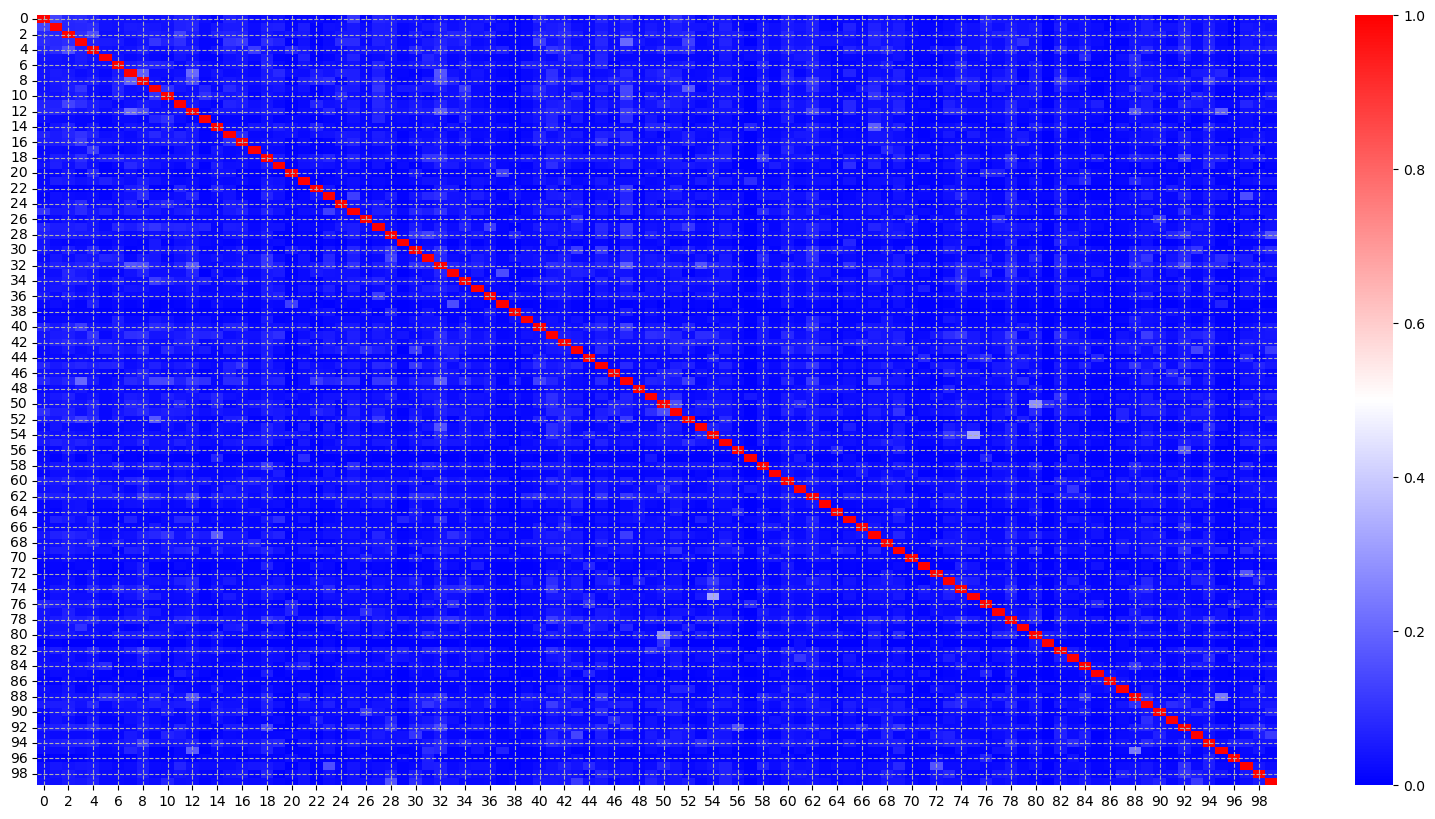

In [85]:
#Trực quan hóa độ tương đồng của 100 bộ phim đầu tiên với nhau:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.figure(figsize=(20,10))

ax = sns.heatmap(cosine_sim[0:100,0:100],
                 cmap='bwr' )
plt.grid(ls='--')
plt.show()

### 3.Tích hợp hệ thống đề xuất
---

In [86]:
#Tạo một biến Series Lấy danh sách tên các bộ film 
#và index tương ứng
indices = pd.Series(data.index,index=data['original_title'])
indices

original_title
La Sortie de l'Usine Lumière à Lyon                 0
Arroseur et arrosé                                  1
L'arrivée d'un train en gare de La Ciotat           2
Le Voyage dans la Lune                              3
The Great Train Robbery                             4
                                                ...  
Good Time                                       11751
What Happened to Monday                         11752
Science Fiction Volume One: The Osiris Child    11753
Leatherface                                     11754
Avatar 2                                        11755
Length: 11756, dtype: int64

**Xây dựng hàm: get_recommend_movies**

đầu vào là tên của một bộ film sau đó dựa vào ma trận cosine_sim để xác định 8 bộ film có độ tương đồng cao theo thứ tự giảm dần.

* input: title, cosine_sim
* output: list 8 film similarity


In [87]:
def get_recommend_movies(title,cosine_sim=cosine_sim):
    #Lấy index của bộ film theo tiêu đề đưa vào
    idx=indices[title]
    
    #Lấy điểm tương đồng theo cặp của tất cả các movies theo tiêu đề bộ film đưa vào
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    #Sắp xếp các bộ film dựa theo điểm tương đồng giảm dần
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    #Lấy điểm của 8 bộ film có độ tương đồng cao nhất
    #Và bao gồm cả bộ phim đưa vào 
    sim_scores_8 = sim_scores[0:9]
    
    #Lấy index tương ứng với bộ film này:
    movies_index = [i[0] for i in sim_scores_8]
    
    #Xóa index của bộ phim đầu vào khỏi danh sách kết quả:
    movies_index.remove(idx)
    
    #trả ra tiêu đề và tóm tắt của 8 bộ film ứng với index
    return data[['original_title','overview','release_date']].iloc[movies_index]

### 4. Sử dụng hệ thống gợi ý:
---
Khi người dùng xem một bộ phim bất kỳ hệ thống sẽ dựa vào tóm tắt của bộ phim người dùng xem để tìm trong CSDL những bộ phim có tóm tắt phim tương tự (nội dung phim giống nhau) nhất để đưa ra gợi ý cho người xem

In [88]:
#Thử với bộ phim có Tóm tắt phim giống nhau:
#Có 3 bộ phim tên khác nhau nhưng có cùng tóm tắt phim:
data.loc[(data['overview']=='A few funny little novels about different aspects of life.')]

,original_title,original_language,overview,release_date,vote_average,vote_count
2503,Le comiche,it,A few funny little novels about different aspe...,1990-01-01,5.7,59.0
2738,Le comiche 2,it,A few funny little novels about different aspe...,1991-10-19,5.5,47.0
3066,Le nuove comiche,it,A few funny little novels about different aspe...,1994-01-01,5.0,32.0


In [89]:
#Khi đưa vào hệ thống đề xuất để gợi ý, nếu đầu vào là 1 trong 3 bộ phim
#này thì đầu ra phải chứa 2 bộ phim còn lại vì có cùng tóm tắt phim
#nên độ tương đồng sẽ cao nhất (=1)
#Check:
get_recommend_movies('Le nuove comiche')

,original_title,overview,release_date
2503,Le comiche,A few funny little novels about different aspe...,1990-01-01
2738,Le comiche 2,A few funny little novels about different aspe...,1991-10-19
1109,Le Magnifique,François Merlin (Belmondo) is a Jean Bruce typ...,1973-11-23
7074,Italians,"The film consists of two episodes, telling two...",2009-01-01
9684,Nymphomaniac: Vol. II,The continuation of Joe's sexually dictated li...,2013-12-25
6316,Northanger Abbey,A young woman's penchant for sensational Gothi...,2007-03-25
3357,La flor de mi secreto,"Marisa Paredes is Leocadia (""Leo"") Macias, a w...",1995-09-22
10876,Hyena Road,"Three different men, three different worlds, t...",2015-10-09


In [90]:
#Thử đề xuất với tên bộ film bất kỳ
#1. Bộ film: Batman Forever
get_recommend_movies('Batman Forever')

,original_title,overview,release_date
8776,The Dark Knight Rises,Following the death of District Attorney Harve...,2012-07-16
11111,Batman: Bad Blood,Bruce Wayne is missing. Alfred covers for him ...,2016-03-22
11430,Batman: Return of the Caped Crusaders,Adam West and Burt Ward returns to their iconi...,2016-10-08
6826,The Dark Knight,Batman raises the stakes in his war on crime. ...,2008-07-16
3060,Batman: Mask of the Phantasm,An old flame of Bruce Wayne's strolls into tow...,1993-12-25
5632,Batman Begins,"Driven by tragedy, billionaire Bruce Wayne ded...",2005-06-10
8854,"Batman: The Dark Knight Returns, Part 1",Batman has not been seen for ten years. A new ...,2012-09-06
3975,Batman Beyond: The Movie,"Fueled by remorse and vengeance, a high school...",1999-01-10


In [91]:
#Thử đề xuất với tên bộ film bất kỳ
#2. Bộ film: Star Wars
get_recommend_movies('Star Wars')

,original_title,overview,release_date
1474,The Empire Strikes Back,"The epic saga continues as Luke Skywalker, in ...",1980-05-17
1384,The Star Wars Holiday Special,Luke Skywalker and Han Solo battle evil Imperi...,1978-12-01
10977,Star Wars: The Force Awakens,Thirty years after defeating the Galactic Empi...,2015-12-15
1723,Return of the Jedi,As Rebel leaders map their strategy for an all...,1983-05-23
7043,1½ Ritter - Auf der Suche nach der hinreißende...,The story of Lanze who is in love with the pri...,2008-12-17
6550,Lissi und der wilde Kaiser,The plot concerns a yeti who makes a pact with...,2007-10-24
3217,The Swan Princess,The beautiful princess Odette is transformed i...,1994-11-18
11278,キングスグレイブ ファイナルファンタジーXV,The magical kingdom of Lucis is home to the wo...,2016-07-09


In [92]:
#Thử đề xuất với tên bộ film bất kỳ
#3. Bộ film: Titanic
get_recommend_movies('Titanic')

,original_title,overview,release_date
3936,La leggenda del pianista sull'oceano,The story of a virtuoso piano player who lives...,1998-10-28
7785,Titanic II,On the 100th anniversary of the original voyag...,2010-08-07
7382,I Can Do Bad All By Myself,When Madea catches sixteen-year-old Jennifer a...,2009-09-11
4930,Pieces of April,Quirky and rebellious April Burns lives with h...,2003-01-19
3695,Event Horizon,In the year 2047 a group of astronauts are sen...,1997-08-15
10695,3-Headed Shark Attack,The world’s greatest killing machine is three ...,2015-07-20
2702,おもひでぽろぽろ,"It’s 1982, and Taeko is 27 years old, unmarrie...",1991-07-20
2758,Fantaghirò,In the middle of a war between two kingdoms qu...,1991-12-22


## THỰC HÀNH:
----
1. Sinh viên đọc file dữ liệu Data_VN_2021.xlsx, lưu trữ thông tin của 63 tỉnh, thành phố của Việt Nam
2. Sử dụng phương pháp trích chọn đặc trưng TF-IDF để vector hóa dữ liệu tên các tỉnh/thành phố
3. Sử dụng độ đo cosine để tính toán độ tương đồng giữa các tên từ vector TF-IDF, trực quan hóa kết quả 
4. Xây dựng hàm trả về tên 5 tỉnh/thành phố gần nhất với tên một tỉnh/thành phố đưa vào?